# Installing required Packages 

In [1]:
!pip install -q ultralytics roboflow

In [1]:
import tensorflow as tf
import os
from roboflow import Roboflow
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd

# Loading the different datasets from their respective directories

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 416
CHANNELS = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [ ]:
rf = Roboflow(api_key="0VZYY90r4l05ICemwLNZ")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")

In [98]:
#!mv ./Self* ./dataset
!move Self* dataset

#!cd dataset && rm data.yaml README*
!cd dataset && del data.yaml README*

A duplicate file name exists, or the file
cannot be found.
Could Not Find C:\Users\medra\OneDrive\Desktop\Projet AI\model inference\dataset\data.yaml


In [99]:
import shutil
from sklearn.model_selection import train_test_split

def merge_directories(base_dir, output_dir):

    images_dir = os.path.join(output_dir, 'images')
    labels_dir = os.path.join(output_dir, 'labels')
    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)

    for folder in ['test', 'train', 'valid']:
        for subfolder in ['images', 'labels']:
            src_path = os.path.join(base_dir, folder, subfolder)
            if os.path.exists(src_path):
                for file in os.listdir(src_path):
                    src_file = os.path.join(src_path, file)
                    if os.path.isfile(src_file):
                        shutil.copy(src_file, os.path.join(output_dir, subfolder, file))


base_dir = "./dataset"
output_dir = "./combined_dataset"

merge_directories(base_dir, output_dir)

print("Processing complete. Directoy contents were merged successfully.")


def split_dataset(images_dir, labels_dir, output_dir, test_ratio=0.2, val_ratio=0.2):

    image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.png')]
    label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

    image_files.sort()
    label_files.sort()

    images_train, images_temp, labels_train, labels_temp = train_test_split(image_files, label_files, test_size=test_ratio + val_ratio, random_state=15)

    test_size = test_ratio / (test_ratio + val_ratio)

    images_val, images_test, labels_val, labels_test = train_test_split(images_temp, labels_temp, test_size=test_size, random_state=15)

    subsets = {
        'train': (images_train, labels_train),
        'test': (images_test, labels_test),
        'valid': (images_val, labels_val)
    }

    for subset, (image_list, label_list) in subsets.items():
        subset_images_dir = os.path.join(output_dir, subset, 'images')
        subset_labels_dir = os.path.join(output_dir, subset, 'labels')
        os.makedirs(subset_images_dir, exist_ok=True)
        os.makedirs(subset_labels_dir, exist_ok=True)

        for image, label in zip(image_list, label_list):
            shutil.copy(os.path.join(images_dir, image), subset_images_dir)
            shutil.copy(os.path.join(labels_dir, label), subset_labels_dir)




random_split_data = './Split_Dataset'
images_dir = os.path.join(output_dir, './images')
labels_dir = os.path.join(output_dir, './labels')

split_dataset(images_dir, labels_dir, random_split_data)

print("Processing complete. Classes extracted and dataset split successfully.")



import shutil

classes = {
    '0':'Green Light',
    '1':'Red Light',
    '2':'Speed Limit 10',
    '3':'Speed Limit 100',
    '4':'Speed Limit 110',
    '5':'Speed Limit 120',
    '6':'Speed Limit 20',
    '7':'Speed Limit 30',
    '8':'Speed Limit 40',
    '9':'Speed Limit 50',
    '10':'Speed Limit 60',
    '11':'Speed Limit 70',
    '12':'Speed Limit 80',
    '13':'Speed Limit 90',
    '14':'Stop' }


def organize_images_by_class(image_dir, label_dir, output_dir):

    os.makedirs(output_dir, exist_ok=True)

    label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

    for label_file in label_files:
        label_path = os.path.join(label_dir, label_file)
        with open(label_path, 'r') as file:
            lines = file.readlines()
            if not lines:
                print(f"Warning: {label_file} is empty. Skipping.")
                continue
            first_class_id = classes[lines[0].split()[0]]

        image_name = os.path.splitext(label_file)[0]
        image_path = os.path.join(image_dir, f"{image_name}.jpg")


        class_dir = os.path.join(output_dir, first_class_id)
        os.makedirs(class_dir, exist_ok=True)

        shutil.copy(image_path, class_dir)

    print("Organizing complete successfully.")


###########################################
#input_dir = './dataset/test'

#image_test2_directory = './dataset/test/images'
#label_test2_directory = './dataset/test/labels'
#output_test2_directory = "./test2"

#organize_images_by_class(image_test2_directory, label_test2_directory, output_test2_directory)

#test2_data = tf.keras.utils.image_dataset_from_directory(
    #output_test2_directory,
    #image_size=(IMAGE_SIZE, IMAGE_SIZE),
    #shuffle=False)
###########################################

image_train_directory = os.path.join(random_split_data, './train/images')
label_train_directory = os.path.join(random_split_data, './train/labels')
output_train_directory = "./train"

organize_images_by_class(image_train_directory, label_train_directory, output_train_directory)



image_valid_directory = os.path.join(random_split_data, './valid/images')
label_valid_directory = os.path.join(random_split_data, './valid/labels')
output_valid_directory = "./valid/"

organize_images_by_class(image_valid_directory, label_valid_directory, output_valid_directory)


image_test_directory = os.path.join(random_split_data, './test/images')
label_test_directory = os.path.join(random_split_data, './test/labels')
output_test_directory = "./test/"

organize_images_by_class(image_test_directory, label_test_directory, output_test_directory)


Processing complete. Directoy contents were merged successfully.
Processing complete. Classes extracted and dataset split successfully.
Organizing complete successfully.
Organizing complete successfully.
Organizing complete successfully.


In [3]:
import shutil

files = [
    (".\test\Speed Limit 20\FisheyeCamera_1_00007_png.rf.7c46848a1a6f8be2357f2dbce71bb831.jpg",
     ".\test\Stop\FisheyeCamera_1_00007_png.rf.7c46848a1a6f8be2357f2dbce71bb831.jpg"),
    (".\test\Green Light\10e68c49-ad28-48de-b2c6-a7ce3101793b_jpg.rf.de99cbbd66d910c39cdaa751558652ed.jpg",
     ".\test\Red Light\10e68c49-ad28-48de-b2c6-a7ce3101793b_jpg.rf.de99cbbd66d910c39cdaa751558652ed.jpg"),
    (".\test\Green Light\000919_jpg.rf.4d17143a9131a9a9ac9179d4f057e260.jpg",
     ".\test\Red Light\000919_jpg.rf.4d17143a9131a9a9ac9179d4f057e260.jpg"),
    (".\test\Green Light\FisheyeCamera_1_00444_png.rf.fbc0164b5012ad8e1994074c83b3ce41.jpg",
     ".\test\Red Light\FisheyeCamera_1_00444_png.rf.fbc0164b5012ad8e1994074c83b3ce41.jpg"),
    (".\train\Green Light\FisheyeCamera_1_00448_png.rf.0daa875f86a19ceca7ee1bbfbcb48284.jpg",
     ".\train\Red Light\FisheyeCamera_1_00448_png.rf.0daa875f86a19ceca7ee1bbfbcb48284.jpg"),
    (".\train\Green Light\FisheyeCamera_1_00432_png.rf.d6abb2cc9a3c3e11e8b75496dcdf8239.jpg",
     ".\train\Red Light\FisheyeCamera_1_00432_png.rf.d6abb2cc9a3c3e11e8b75496dcdf8239.jpg"),
    (".\train\Green Light\FisheyeCamera_1_00436_png.rf.2f8e7b2964187fa47e37589cf405a656.jpg",
     ".\train\Red Light\FisheyeCamera_1_00436_png.rf.2f8e7b2964187fa47e37589cf405a656.jpg"),
    (".\train\Green Light\FisheyeCamera_1_00438_png.rf.5a1bdf3a174021e4879d4ecf16704bf5.jpg",
     ".\train\Red Light\FisheyeCamera_1_00438_png.rf.5a1bdf3a174021e4879d4ecf16704bf5.jpg"),
    (".\train\Green Light\FisheyeCamera_1_00453_png.rf.2e48bb3302083646527d2e645a2aaf6c.jpg",
     ".\train\Red Light\FisheyeCamera_1_00453_png.rf.2e48bb3302083646527d2e645a2aaf6c.jpg"),
    (".\train\Green Light\FisheyeCamera_1_00455_png.rf.417e1bc30feb7362cb8aa0cc229f80b3.jpg",
     ".\train\Red Light\FisheyeCamera_1_00455_png.rf.417e1bc30feb7362cb8aa0cc229f80b3.jpg"),
    (".\train\Speed Limit 20\FisheyeCamera_1_00010_png.rf.f8818318fe8f4171e66b59db3bcaa62a.jpg",
     ".\train\Stop\FisheyeCamera_1_00010_png.rf.f8818318fe8f4171e66b59db3bcaa62a.jpg"),
    (".\train\Speed Limit 20\FisheyeCamera_1_00005_png.rf.2c3a5ef517c817ce7872439ac76a7c08.jpg",
     ".\train\Stop\FisheyeCamera_1_00005_png.rf.2c3a5ef517c817ce7872439ac76a7c08.jpg"),
    (".\train\Speed Limit 90\000838_jpg.rf.e0eb95a78a036190800afb455e24768e.jpg",
     ".\train\Speed Limit 30\000838_jpg.rf.e0eb95a78a036190800afb455e24768e.jpg"),
    (".\train\Speed Limit 100\001206_jpg.rf.8a5c5cff39957ab4aa0328ac121a8053.jpg",
     ".\train\Speed Limit 110\001206_jpg.rf.8a5c5cff39957ab4aa0328ac121a8053.jpg"),
    (".\train\Speed Limit 110\001436_jpg.rf.cc8f571352da66682260166ac2086168.jpg",
     ".\train\Speed Limit 120\001436_jpg.rf.cc8f571352da66682260166ac2086168.jpg")
]

for source_path, destination_path in files:
    try:
        shutil.move(source_path, destination_path)
        print(f"Moved: {source_path} -> {destination_path}")
    except FileNotFoundError:
        print(f"File not found: {source_path}")
    except Exception as e:
        print(f"Error moving {source_path} to {destination_path}: {e}")


SyntaxError: unterminated string literal (detected at line 5) (4078933383.py, line 5)

In [ ]:
# Files to delete
files_to_delete = [
    r".\test\Stop\road825_png.rf.edd11b214c98691900d7161d1d445086.jpg",
    r".\test\Stop\road73_png.rf.3d3e70e98db37845a47dbf47ceb49047.jpg",
    r".\test\Stop\road270_png.rf.f2fdeb005bc64af59918beeae3c5c5fb.jpg",
    r".\test\Stop\road275_png.rf.640d7a8d1d40808df647e72b0d0fd9c1.jpg",
    r".\test\Stop\road823_png.rf.293f977a932e78259dbf84f2cb12630d.jpg",
    r".\test\Speed Limit 120\FisheyeCamera_1_00569_png.rf.6167533900e94fd898404f9f3a5954a5.jpg",
    r".\test\Speed Limit 120\road742_png.rf.40e35aaca13d769c15edb4f74bf84cc1.jpg",
    r".\test\Speed Limit 120\road740_png.rf.eff9e3f125b2d4f2717a3fa6ce5c6774.jpg",
    r".\test\Speed Limit 120\road736_png.rf.503469c0b6161bf070bc9181463e92a2.jpg",
    r".\test\Speed Limit 120\road708_png.rf.d9bf7da6e0e73af3295909a18a2cabee.jpg",
    r".\test\Speed Limit 120\road698_png.rf.edeaba4ab25286c3f8c02a3098772c96.jpg",
    r".\test\Speed Limit 120\road694_png.rf.5012bb37b65ec3ba274f1a46b2d05915.jpg",
    r".\test\Speed Limit 120\road687_png.rf.8daf9c2b49e86e877f387f1733c82c3e.jpg",
    r".\test\Speed Limit 110\FisheyeCamera_1_00602_png.rf.f4ca273e488a5df0538dfa86c7236467.jpg",
    r".\test\Speed Limit 110\FisheyeCamera_1_00598_png.rf.bdfc587d1cc225710ef0dbd270799ad5.jpg",
    r".\test\Speed Limit 100\FisheyeCamera_1_00457_png.rf.a208ea70ff8caf6d1cd7b02112e4b151.jpg",
    r".\test\Speed Limit 100\FisheyeCamera_1_00452_png.rf.191ce8146a584a06e35097c5dacb6c4d.jpg",
    r".\test\Speed Limit 100\road243_png.rf.555053220adbac3849def1e4105008fd.jpg",
    r".\test\Speed Limit 100\road247_png.rf.fcf9d60e9599271c2725b9cc16153d8b.jpg",
    r".\test\Speed Limit 90\FisheyeCamera_1_00280_png.rf.d3143dfa05e6e2440ae58e460994e341.jpg",
    r".\test\Speed Limit 90\FisheyeCamera_1_00280_png.rf.7749b78ac4451a45679b41149da63c53.jpg",
    r".\test\Speed Limit 90\FisheyeCamera_1_00275_png.rf.00bafe9e65d6a1d89d678105ed38ec6e.jpg",
    r".\test\Speed Limit 90\FisheyeCamera_1_00264_png.rf.ce9af51bc252f41836019ba9b9a4b2cc.jpg",
    r".\test\Speed Limit 90\FisheyeCamera_1_00285_png.rf.cbc33d5d21aad4b5d0d195479cb4f9ef.jpg",
    r".\test\Speed Limit 80\FisheyeCamera_1_00364_png.rf.a9a2ae260182758dd32759d27a3f08ae.jpg",
    r".\test\Speed Limit 80\road240_png.rf.f6dd00c9517424dd9405783abfb1f444.jpg",
    r".\test\Speed Limit 80\000559_jpg.rf.e1a6dcc12c122dde952d392aa048805b.jpg",
    r".\test\Speed Limit 60\road655_png.rf.ff15054285f0f0f70cd01a48ab24b450.jpg",
    r".\test\Speed Limit 20\FisheyeCamera_1_00012_png.rf.dec10cb0f72af007819df9094cd744ca.jpg",
    r".\test\Speed Limit 20\FisheyeCamera_1_00018_png.rf.020880ddd4767d0a7f0b20ac31fc1cae.jpg",
    r".\test\Speed Limit 20\FisheyeCamera_1_00021_png.rf.f9cfa3dc0f5d2e235ccdf5c468ff9ed2.jpg",
    r".\test\Green Light\0629fae7-2357-4fa2-a599-750358cf7e2e_jpg.rf.363911291d5f6f7fe0e031331fd7e4e9.jpg",
    r".\test\Green Light\000831_jpg.rf.311dfb9a79b82df23b714f71f7e0aa8d.jpg",
    r".\test\Green Light\000891_jpg.rf.4f982b26819294a8b9ad835d731dc8d4.jpg",
    r".\test\Green Light\000925_jpg.rf.625ba383aba6e63158abf1028effdbbe.jpg",
    r".\test\Green Light\000943_jpg.rf.5804c57584088d84e89f6214d8baa6aa.jpg",
    r".\test\Green Light\001046_jpg.rf.4b6711717ecf3be158ee3d051cfe0222.jpg",
    r".\test\Green Light\09282467-3e63-4506-9252-a0fd5b913deb_jpg.rf.7c3a79616a712d7b1f231bc9108d8db7.jpg",
    r".\test\Green Light\FisheyeCamera_1_00027_png.rf.1eecd7bdb4385d5ce401f937e03f5686.jpg",
    r".\test\Green Light\FisheyeCamera_1_00044_png.rf.df51f96d08027bf655282e3420b6c503.jpg",
    r".\test\Green Light\FisheyeCamera_1_00045_png.rf.60026680216e6e3c63b29087609c98b6.jpg",
    r".\test\Green Light\FisheyeCamera_1_00063_png.rf.8635a31b244b3f949b86ae2579be3e73.jpg",
    r".\test\Green Light\FisheyeCamera_1_00067_png.rf.d467b75fc7ecb18e096d25f566d73ef3.jpg",
    r".\test\Green Light\FisheyeCamera_1_00225_png.rf.065e5230529c71668f7ae887894ac8f4.jpg",
    r".\test\Green Light\FisheyeCamera_1_00479_png.rf.f7e77b725ba1e70b5dc8b0697e0b1f92.jpg",
    r".\test\Green Light\road466_png.rf.d57ae6325b53f1b11ebb16fbfefd48e0.jpg",
    r".\test\Red Light\000993_jpg.rf.c7e3129f3ff8c5c3b8d4c63b364cdd92.jpg",
    r".\test\Red Light\001065_jpg.rf.07c50b5f8a4d2c6117b6f2df2e1930e1.jpg",
    r".\test\Red Light\FisheyeCamera_1_00124_png.rf.8b002752e8490fc67629003aae5ed0d7.jpg",
    r".\test\Red Light\FisheyeCamera_1_00193_png.rf.92de0900f8e765c69f52ab1266754c90.jpg",
    r".\test\Red Light\FisheyeCamera_1_00198_png.rf.773e24d037635ddfef8e56bdc92dab9c.jpg",
    r".\test\Red Light\FisheyeCamera_1_00198_png.rf.dd6af93e58d256343ff655e963b2cb40.jpg",
    r".\test\Red Light\FisheyeCamera_1_00270_png.rf.95aa5ad31030ab9cd336ee5b10d9877e.jpg",
    r".\test\Red Light\FisheyeCamera_1_00587_png.rf.8f637c2480c931d014f8cc2877541abd.jpg",
    r".\test\Red Light\FisheyeCamera_1_00609_png.rf.4a760373c5e6adb7c97101dc45862ef0.jpg",
    r".\test\Red Light\FisheyeCamera_1_00611_png.rf.95c28a2b1cef7631416a19a00868bab2.jpg",
    r".\test\Red Light\FisheyeCamera_1_00618_png.rf.f0f83b73711e54a134bf56041d90afd2.jpg",
    r".\test\Red Light\FisheyeCamera_1_00956_png.rf.a6bcf5d05e3aad16c8e784dfd895539e.jpg",
    r".\test\Red Light\FisheyeCamera_1_00959_png.rf.dbf7ff975261924519e4bafef776c4d0.jpg",
    r".\test\Speed Limit 30\FisheyeCamera_1_00099_png.rf.74f630b93729823470896eeb96198497.jpg",
    r".\test\Speed Limit 30\FisheyeCamera_1_00074_png.rf.f6969edc29e5af5aa20e2d77c72262d6.jpg",
    r".\test\Speed Limit 30\FisheyeCamera_1_00079_png.rf.c5f44a549410473fbeeb8712330ef5bc.jpg",
    r".\test\Speed Limit 30\FisheyeCamera_1_00091_png.rf.ac7125e933ee5d0179d53320fdad7032.jpg",
    r".\test\Speed Limit 30\FisheyeCamera_1_00095_png.rf.12d33155105d77d52b3e5d6deb5c2bff.jpg",
    r".\test\Speed Limit 30\FisheyeCamera_1_00096_png.rf.0a8785942801fb0380fd532020512c80.jpg",
    r".\test\Speed Limit 40\road656_png.rf.a7aa8a24d4d9f379aaae5bde821ab2f1.jpg",
    r".\test\Speed Limit 40\road652_png.rf.e82e3cfaed8d2378962fd6c1380f5d02.jpg",
    r".\test\Speed Limit 50\road639_png.rf.74306332af06fee257b44f5dd9ae02fb.jpg",
    r".\test\Speed Limit 70\000832_jpg.rf.0a93d0774bfc071f84583febeffb9b47.jpg",
    r".\test\Speed Limit 70\000840_jpg.rf.f5963d4af1e481844d7e0cb4fc659269.jpg",
    r".\test\Speed Limit 70\FisheyeCamera_1_00300_png.rf.533854445ac53a2734cf7bae6227c66b.jpg",
    r".\test\Speed Limit 70\FisheyeCamera_1_00301_png.rf.0e84741e851d1cf8a7c8ffdcad5c0dab.jpg",
    r".\test\Speed Limit 70\FisheyeCamera_1_00308_png.rf.d871ead17aa07e31072efb9f105b9386.jpg",
    r".\test\Speed Limit 70\road638_png.rf.4f1a5b3b72fcf49e88ca28b239a865f6.jpg",
    r".\train\Green Light\000796_jpg.rf.f53632340c6f9441e54f4da49904cf97.jpg",
    r".\train\Green Light\000792_jpg.rf.3899b0ef3229b4f18a7954698cc40c92.jpg",
    r".\train\Green Light\000852_jpg.rf.03817e49d1a71789e0e6c7db5b6bbd34.jpg",
    r".\train\Green Light\000862_jpg.rf.2c2099df81c3156f639d139d5cc04d45.jpg",
    r".\train\Green Light\000912_jpg.rf.a47d1fa8a66368c066835ba4540920d2.jpg",
    r".\train\Green Light\000922_jpg.rf.3ce7cc7e1b769a544c5f4132ce6b5757.jpg",
    r".\train\Green Light\000953_jpg.rf.5154086f77976b3f05bef0e2a6b5cf33.jpg",
    r".\train\Green Light\001047_jpg.rf.0c13a2d7349befde599634bb8510f327.jpg",
    r".\train\Green Light\001633_JPG_jpg.rf.7040c44878b8398f226cd3a64b3ae349.jpg",
    r".\train\Green Light\001965_jpg.rf.ea0a174fcf2889152bd4027ecc3c429d.jpg",
    r".\train\Green Light\FisheyeCamera_1_00050_png.rf.5cec93ca46bdcedf11bb56511c8b1c70.jpg",
    r".\train\Green Light\FisheyeCamera_1_00051_png.rf.b315c716f3a9b45d1f620e3613f0c109.jpg",
    r".\train\Green Light\FisheyeCamera_1_00061_png.rf.0a1b5d958fd7b550291ccfe699238e42.jpg",
    r".\train\Green Light\FisheyeCamera_1_00061_png.rf.5450b15a82110309b8f92d2dab962964.jpg",
    r".\train\Green Light\FisheyeCamera_1_00062_png.rf.85485998f636029033ad8caf40bb09b8.jpg",
    r".\train\Green Light\FisheyeCamera_1_00065_png.rf.63c872dba98b0e36449faebf564f6fa2.jpg",
    r".\train\Green Light\FisheyeCamera_1_00068_png.rf.ad47063479eed0d6613fef68ada3a66d.jpg",
    r".\train\Green Light\FisheyeCamera_1_00023_png.rf.cd1aa333b9e78ad2f7b2de3c154e7429.jpg",
    r".\train\Green Light\FisheyeCamera_1_00030_png.rf.41adca8919e77869c927b7c4b1c045e6.jpg",
    r".\train\Green Light\FisheyeCamera_1_00040_png.rf.3cecfad4b5ce1e13131a33715cc7fb44.jpg",
    r".\train\Green Light\FisheyeCamera_1_00041_png.rf.402d963ad90df5846463e66a301debd3.jpg",
    r".\train\Green Light\FisheyeCamera_1_00049_png.rf.b88ac07b3ded7aba17300b7722eb7742.jpg",
    r".\train\Green Light\FisheyeCamera_1_00076_png.rf.c1649fd1ef9e95ffa77a31dcffb825ed.jpg",
    r".\train\Green Light\FisheyeCamera_1_00077_png.rf.a7498f21d266be318df17477673f7dbb.jpg",
    r".\train\Green Light\FisheyeCamera_1_00077_png.rf.c60e3f2061ac5252ca0023749998ecdc.jpg",
    r".\train\Green Light\FisheyeCamera_1_00073_png.rf.dace87f4aafb740144cbe4ad1a58168e.jpg",
    r".\train\Green Light\FisheyeCamera_1_00197_png.rf.48ad6f7aed4e1e427ef5ea92bd085307.jpg",
    r".\train\Green Light\FisheyeCamera_1_00200_png.rf.2b463a3f59de25ebeecb2854fc481daa.jpg",
    r".\train\Green Light\FisheyeCamera_1_00195_png.rf.c958e21bb68e76adac7817623d7c1f75.jpg",
    r".\train\Green Light\FisheyeCamera_1_00294_png.rf.d87934dcc82f656c9bd59c7a9ec8e0c4.jpg",
    r".\train\Green Light\FisheyeCamera_1_00296_png.rf.88c15b609a391051abdf0ff699c7698e.jpg",
    r".\train\Green Light\FisheyeCamera_1_00205_png.rf.52db184db8227a6f1600056b0a61090a.jpg",
    r".\train\Green Light\FisheyeCamera_1_00210_png.rf.4d971213ecb5e0c4b1fd2e884c67d93f.jpg",
    r".\train\Green Light\FisheyeCamera_1_00211_png.rf.4d937346689834589353be2d154dc924.jpg",
    r".\train\Green Light\FisheyeCamera_1_00211_png.rf.24505de880f58d7fdefebf4637e4fddc.jpg",
    r".\train\Green Light\FisheyeCamera_1_00234_png.rf.ccbb73d7c5d63030d055b4e300c25537.jpg",
    r".\train\Green Light\FisheyeCamera_1_00241_png.rf.0a91cee963570ac96487635995bdb385.jpg",
    r".\train\Green Light\FisheyeCamera_1_00244_png.rf.3e0b9c75278c9a8292756d6f60b7db9f.jpg",
    r".\train\Green Light\FisheyeCamera_1_00251_png.rf.27b5d4355962ea9edf144999f6c8b4fc.jpg",
    r".\train\Green Light\FisheyeCamera_1_00261_png.rf.e5e767cc5187e99e0a04c415b87ec3c1.jpg",
    r".\train\Green Light\FisheyeCamera_1_00273_png.rf.6f84f58e059f878b93dc250858c4a52f.jpg",
    r".\train\Green Light\FisheyeCamera_1_00279_png.rf.2e0a92fd2dfb1632abbebc718f958d2e.jpg",
    r".\train\Green Light\FisheyeCamera_1_00287_png.rf.5c96a49ab854f53e36da93c8b85c0860.jpg",
    r".\train\Green Light\FisheyeCamera_1_00289_png.rf.188895cf2a63dba1a5289309dddc4ed2.jpg",
    r".\train\Green Light\FisheyeCamera_1_00293_png.rf.8644ee2b61ddc208a16610100201ad01.jpg",
    r".\train\Green Light\FisheyeCamera_1_01011_png.rf.7ec967ffbe6da0f423a03b7405d8f133.jpg",
    r".\train\Green Light\FisheyeCamera_1_01013_png.rf.9464970b75fa02363baae3c682e99f39.jpg",
    r".\train\Green Light\FisheyeCamera_1_01017_png.rf.5d62cdd28cefecafbee403caa635e3ae.jpg",
    r".\train\Green Light\FisheyeCamera_1_01017_png.rf.fc353386b0b8723817ec8234db7e3bef.jpg",
    r".\train\Green Light\FisheyeCamera_1_01018_png.rf.fe4a5cf6f9e4840e68598bf4f5e13a4c.jpg",
    r".\train\Green Light\FisheyeCamera_1_01024_png.rf.6430e340bbf84bf287d836865ed22c0a.jpg",
    r".\train\Green Light\FisheyeCamera_1_01026_png.rf.dfb591570ded3c052e6641cb4f2d80c1.jpg",
    r".\train\Green Light\FisheyeCamera_1_00509_png.rf.a4fdcf5053bc422a3b30b4cef69e5ea6.jpg",
    r".\train\Green Light\road272_png.rf.76f6f8e7630ea72a2f0a4ec1ab3d62b8.jpg",
    r".\train\Green Light\road464_png.rf.9db08f01aa831e9ec9a0d71f5c240e38.jpg",
    r".\train\Red Light\road26_png.rf.b4bca68bd5f27b2d7b3af40163a705bc.jpg",
    r".\train\Red Light\road822_png.rf.b3ba7f5457042a083bad8aac3fe5f819.jpg",
    r".\train\Red Light\000779_jpg.rf.0d5bc79f671bf371c6e50bbe25c50dbb.jpg",
    r".\train\Red Light\000781_jpg.rf.2c4a43dca8054072100956ba0fcbfeba.jpg",
    r".\train\Red Light\000785_jpg.rf.5849b47e38a9c9e30a439f934232f51a.jpg",
    r".\train\Red Light\000807_jpg.rf.9702c3775ad7d215070ca1c4c7b40b18.jpg",
    r".\train\Red Light\000833_jpg.rf.cdb4379f43766addc42e51dc0fce2b0c.jpg",
    r".\train\Red Light\000945_jpg.rf.aa8693d8dcfb67de03a2474e780ff00c.jpg",
    r".\train\Red Light\001042_jpg.rf.545beff2bbe5abec5feb037ea45529f6.jpg",
    r".\train\Red Light\001072_jpg.rf.44758fd9ea903be675ecd66132c929fe.jpg",
    r".\train\Red Light\FisheyeCamera_1_00098_png.rf.937d582ee38fb9c9007c37c872df3176.jpg",
    r".\train\Red Light\FisheyeCamera_1_00583_png.rf.3751e899e29440610a820aa333ba9fb5.jpg",
    r".\train\Red Light\FisheyeCamera_1_00593_png.rf.3a07523d6260ac5a72e5814e81f8b66c.jpg",
    r".\train\Red Light\FisheyeCamera_1_00597_png.rf.fa5dbce2daf3091a95300b5058def26d.jpg",
    r".\train\Red Light\FisheyeCamera_1_00603_png.rf.d8371ca155eef1cac710cb82021a72e7.jpg",
    r".\train\Red Light\FisheyeCamera_1_00605_png.rf.e9cfbcf0698620d90c8cbcd986c3ddea.jpg",
    r".\train\Red Light\FisheyeCamera_1_00607_png.rf.058287e5492c004731179583d41ceb41.jpg",
    r".\train\Red Light\FisheyeCamera_1_00613_png.rf.a27fdfca4bca7bc928a111d1cdd5438b.jpg",
    r".\train\Red Light\FisheyeCamera_1_00618_png.rf.46737c10a744b8332d63c5c79190a4dd.jpg",
    r".\train\Red Light\FisheyeCamera_1_00627_png.rf.8fd73bc9f11281568f12f1e9686e317f.jpg",
    r".\train\Speed Limit 20\FisheyeCamera_1_00014_png.rf.dc026ede70fb1719befc498babae4206.jpg",
    r".\train\Speed Limit 20\FisheyeCamera_1_00014_png.rf.81fde93a295fe5b4a9adcb9cbd83e5e0.jpg",
    r".\train\Speed Limit 20\FisheyeCamera_1_00023_png.rf.f66009d2ae590556aff978c459f13c6b.jpg",
    r".\train\Speed Limit 30\000094_jpg.rf.d258bac58a5d4910bd9405384854f0fb.jpg",
    r".\train\Speed Limit 30\000424_jpg.rf.79bece8e750129af99bca5825d4709aa.jpg",
    r".\train\Speed Limit 30\000798_jpg.rf.ad09d16ffa7ada3d5807b5bfb3593b92.jpg",
    r".\train\Speed Limit 30\000805_jpg.rf.94d2e8ac75427db493e80a39372f51f6.jpg",
    r".\train\Speed Limit 30\001682_JPG_jpg.rf.128ff5c5bceaae6e30336e50808a2632.jpg",
    r".\train\Speed Limit 30\FisheyeCamera_1_00086_png.rf.285c7768c07b1ce2c11df1f57666031c.jpg",
    r".\train\Speed Limit 30\FisheyeCamera_1_00096_png.rf.0aa3159f12b087bc8c086cbc7b842adf.jpg",
    r".\train\Speed Limit 30\FisheyeCamera_1_00097_png.rf.316f668cf00be0098fda3b4f84dfb229.jpg",
    r".\train\Speed Limit 30\FisheyeCamera_1_00097_png.rf.fb72097a4038b905024bea71b14c1434.jpg",
    r".\train\Speed Limit 30\FisheyeCamera_1_00100_png.rf.683a106328c4647fb8dcd00c1c2af90f.jpg",
    r".\train\Speed Limit 30\FisheyeCamera_1_00101_png.rf.68eee0d5b13b0be9179b9e3900b61342.jpg",
    r".\train\Speed Limit 30\FisheyeCamera_1_00103_png.rf.ce8c1d51005cf155877f21a78ae77709.jpg",
    r".\train\Speed Limit 30\FisheyeCamera_1_00104_png.rf.6e93a0c87a450136c3c4602d636b48bb.jpg",
    r".\train\Speed Limit 30\FisheyeCamera_1_00029_png.rf.d1873828187007b2c95cb44f9abf7aff.jpg",
    r".\train\Speed Limit 40\FisheyeCamera_1_00044_png.rf.73520206bf7d66ab951c7eab6d7ba8e7.jpg",
    r".\train\Speed Limit 40\road654_png.rf.dccac1ff09c216df1ecd3c90e1d3923b.jpg",
    r".\train\Speed Limit 40\road658_png.rf.9a804c80fd15899ec47843c3cd866556.jpg",
    r".\train\Speed Limit 50\000802_jpg.rf.0a8cb75786059f74fb9f8144c7cf99bd.jpg",
    r".\train\Speed Limit 50\000839_jpg.rf.1d54eb7f736b6b4fd59a9c37e59a6745.jpg",
    r".\train\Speed Limit 50\001685_JPG_jpg.rf.91a346061ab17e42bdb4292b2062d26e.jpg",
    r".\train\Speed Limit 50\001836_JPG_jpg.rf.6b05f2d4dc6e48d0696c797bad5463f1.jpg",
    r".\train\Speed Limit 50\FisheyeCamera_1_00152_png.rf.6882869c6bff201a03ed3a5e82bc7c5a.jpg",
    r".\train\Speed Limit 50\FisheyeCamera_1_00142_png.rf.c5f6af45fb865a6d1411a2964a4a87ec.jpg",
    r".\train\Speed Limit 50\FisheyeCamera_1_00142_png.rf.def6aeee07cff082ea33cd3d659e7024.jpg",
    r".\train\Speed Limit 50\FisheyeCamera_1_00143_png.rf.956f2724a5ab97ff9526ba4529daf516.jpg",
    r".\train\Speed Limit 50\FisheyeCamera_1_00143_png.rf.bfa89392b35e6b330522d87fe7c56900.jpg",
    r".\train\Speed Limit 50\FisheyeCamera_1_00144_png.rf.47832f9d95f0df3ba4cd7b2180e9d994.jpg",
    r".\train\Speed Limit 50\FisheyeCamera_1_00146_png.rf.dafec336102ba27c80f1508140e67c37.jpg",
    r".\train\Speed Limit 50\FisheyeCamera_1_00147_png.rf.edacfc9351b479dd28b5628a8c903ffe.jpg",
    r".\train\Speed Limit 50\FisheyeCamera_1_00151_png.rf.40918314c73188f052996f97a35f506b.jpg",
    r".\train\Speed Limit 60\000881_jpg.rf.f51b2eaf4cd9f3a408aa4a49bda8702d.jpg",
    r".\train\Speed Limit 60\000784_jpg.rf.c1037cceed7fc8340757eca0e3b387ad.jpg",
    r".\train\Speed Limit 60\road653_png.rf.a69e562a3dab509d536c1f6d7689c4de.jpg",
    r".\train\Speed Limit 60\FisheyeCamera_1_00226_png.rf.7d72b3baff7cf67a16920de5566fc362.jpg",
    r".\train\Speed Limit 60\FisheyeCamera_1_00227_png.rf.db30b676091df2abb51c1020a614d20c.jpg",
    r".\train\Speed Limit 60\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg",
    r".\train\Speed Limit 60\FisheyeCamera_1_00229_png.rf.bb527b6d42c688228158004f06d515e4.jpg",
    r".\train\Speed Limit 60\FisheyeCamera_1_00230_png.rf.3164aadf2e0667436fd6e53af8a4c48c.jpg",
    r".\train\Speed Limit 60\FisheyeCamera_1_00231_png.rf.12646ed2f7da656423adac8360df60d9.jpg",
    r".\train\Speed Limit 60\FisheyeCamera_1_00232_png.rf.4bae308e0a0887f039beb21673ff3c90.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00321_png.rf.2d5e57accea22fb2ca8b5eaae5869c37.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00304_png.rf.bc583d8c6e54caa95002a665dca586a6.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00309_png.rf.b2715e68485321eb38ce5e2209ff9bb4.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00311_png.rf.b0abeeb32df8e582d0584c01e8a3e5d8.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00312_png.rf.0f026f535efd3c25c4c3bd985f169bdd.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00314_png.rf.f10aa9e570183b2892515007c415b9cf.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00315_png.rf.14c625eca5ff0f371a2459cb470b6dd5.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00316_png.rf.0f156117927834991e5729d95ec5910b.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00317_png.rf.76c361260bc3364e12a9f880c8d2e36b.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00318_png.rf.031d65ad68677a577ed39965b996ff9a.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00320_png.rf.8ed7abc4d5176241e81493f639ab796f.jpg",
    r".\train\Speed Limit 60\FisheyeCamera_1_00233_png.rf.3450548a748f50e3b65e6660864e74f0.jpg",
    r".\train\Speed Limit 60\FisheyeCamera_1_00235_png.rf.f2848657d28acb60c18ac583beb1fd76.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00295_png.rf.239e85f103baac3453e191fa980fb803.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00297_png.rf.7ca5976b458a032571f7d94a4cfed60c.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00303_png.rf.54d5081b351bef92afe6bceaa3441d88.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00303_png.rf.9696af99fd15d8ad067c1226a005a79d.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00282_png.rf.8432bcb7705139cd0bcd1421987aaff7.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00283_png.rf.e88cf39eb00a52dfcceb2fcfddf89260.jpg",
    r".\train\Speed Limit 70\FisheyeCamera_1_00286_png.rf.21782aa4b26c0fca303c6252dbe4c0ff.jpg",
    r".\train\Speed Limit 80\000648_jpg.rf.515554f5e640a5464f12bf6042d9acc1.jpg",
    r".\train\Speed Limit 100\FisheyeCamera_1_00480_png.rf.ff94615495e0c4eb7cd3a1cfce3cf2cd.jpg",
    r".\train\Speed Limit 100\FisheyeCamera_1_00454_png.rf.69544c267e97e6de7d8ff36d70f8a8f6.jpg",
    r".\train\Speed Limit 100\FisheyeCamera_1_00456_png.rf.3aaef1ecc3d40d6a2513698b42395ed5.jpg",
    r".\train\Speed Limit 100\FisheyeCamera_1_00459_png.rf.b605e69dbf7d44348ba69367ef5db787.jpg",
    r".\train\Speed Limit 100\FisheyeCamera_1_00477_png.rf.90af3f1491f3612e597bb66dec187e06.jpg",
    r".\train\Speed Limit 100\FisheyeCamera_1_00478_png.rf.50cac972193c94522a89221a7a75d0e1.jpg",
    r".\train\Speed Limit 80\000829_jpg.rf.58d520b7f3fa3ff7fed6fe14159fb535.jpg",
    r".\train\Speed Limit 90\000754_jpg.rf.14060f80258829694549cc005fae6148.jpg",
    r".\train\Speed Limit 100\001051_jpg.rf.bb8152d7d7c35ed73bfc9239185f9087.jpg",
    r".\train\Speed Limit 100\road241_png.rf.4c01d1c3dea4c729c05ee89d340c59f8.jpg",
    r".\train\Speed Limit 100\road693_png.rf.baeb9a13157b7d1e8a9f9153047e133b.jpg",
    r".\train\Speed Limit 100\road715_png.rf.8f64e298582aad10eef86de67ef78923.jpg",
    r".\train\Speed Limit 100\road728_png.rf.fdd5ede97ccfb0315314e3670903d571.jpg",
    r".\train\Speed Limit 100\road733_png.rf.3d0f8656ec92e5ce09b995b714d83a0f.jpg",
    r".\train\Speed Limit 100\road735_png.rf.1f434772779d9d51e64dccc3856c02d1.jpg",
    r".\train\Speed Limit 100\road737_png.rf.bd797ddd2eb3c76a7b72c02992d15095.jpg",
    r".\train\Speed Limit 100\road741_png.rf.8c3457e208250110c7ece81ea9a04fd8.jpg",
    r".\train\Speed Limit 100\road743_png.rf.09b77e4a47a21b7c3482c28b37c86ecb.jpg",
    r".\train\Speed Limit 100\road745_png.rf.f5f996e3c3983d3a188ab2f4ae6af69e.jpg",
    r".\train\Speed Limit 100\road749_png.rf.2a29c294f24af6af869bafacf4456919.jpg",
    r".\train\Speed Limit 100\road750_png.rf.84c29f6e5a4f734c5ebfb97fa9f452cc.jpg",
    r".\train\Speed Limit 100\road691_png.rf.3ca3931933e5623e51596577124c3447.jpg",
    r".\train\Speed Limit 100\road695_png.rf.aa31ed894fa0b3796c4865db5e00ebac.jpg",
    r".\train\Speed Limit 100\road703_png.rf.0140915a317a8a89d807e36a87ae626e.jpg",
    r".\train\Speed Limit 100\road705_png.rf.b86eaf5000139f86d67f007728db8e42.jpg",
    r".\train\Speed Limit 100\road713_png.rf.a71744edd4c111a2115746a0abe095b4.jpg",
    r".\train\Speed Limit 120\road690_png.rf.d5b20bfbe68b0084150c1cf7328e5a43.jpg",
    r".\train\Speed Limit 120\road692_png.rf.428a4cfb2f374f0acb60ffc5c57e0750.jpg",
    r".\train\Speed Limit 120\road699_png.rf.57a9d633d7859051a3e8525f4824a9a0.jpg",
    r".\train\Speed Limit 120\road700_png.rf.54fce54e96313fc80b29341cb072b2d0.jpg",
    r".\train\Speed Limit 120\road702_png.rf.3ee3727a1ceb0fc9cb1c2bbbbfea3f9f.jpg",
    r".\train\Speed Limit 120\road704_png.rf.ce172e931d893de35cd51ce03bed67c9.jpg",
    r".\train\Speed Limit 120\road706_png.rf.4cae59ad50149b0cc0d61cb94855279f.jpg",
    r".\train\Speed Limit 120\road710_png.rf.2ad28439dfd9f4eb4f972f908cb5c481.jpg",
    r".\train\Speed Limit 120\road712_png.rf.ee2432f1a6c4df0988307770b8e199d9.jpg",
    r".\train\Speed Limit 120\road714_png.rf.f46b2481d8901e97bf7d752c1d272cde.jpg",
    r".\train\Speed Limit 120\road718_png.rf.94dc70125e3e379d9af523a4d38d6c91.jpg",
    r".\train\Speed Limit 120\road729_png.rf.b894177c5032579f808cc591a19edb2b.jpg",
    r".\train\Speed Limit 120\road732_png.rf.02c4240480b86f12812f9e6ac99961f2.jpg",
    r".\train\Speed Limit 120\road738_png.rf.b77223254f74927b15efc4a6c0235d1b.jpg",
    r".\train\Speed Limit 120\road746_png.rf.16a262dc32378a4529131ba5aed1e815.jpg",
    r".\train\Speed Limit 120\road748_png.rf.cbfa6537787a86729e4bc53e78b98051.jpg",
    r".\train\Speed Limit 120\road751_png.rf.c1eec777c6104e50ca51a2a5d234b5d1.jpg",
    r".\train\Speed Limit 120\road248_png.rf.8b4bd6de7d63c69053d54f68fdaa7840.jpg",
    r".\train\Speed Limit 120\001492_jpg.rf.846769ab5576135ac942d7e6d837093d.jpg",
    r".\train\Stop\road70_png.rf.d2ea834dc600c103a18b073faf955857.jpg",
    r".\train\Stop\road278_png.rf.7868a9c60c1588fb20964fc6a8302a44.jpg",
    r".\train\Stop\road819_png.rf.102970997e42717b71177acc1f71f554.jpg",
    r".\train\Stop\road820_png.rf.84c419beb4bfd13b6e9363920f97e752.jpg",
    r".\train\Stop\road821_png.rf.ac4ee14f863b8d3b383f87e88a06a503.jpg",
    r".\train\Stop\road826_png.rf.499e6d5c8b79f7e991153911880c6c3c.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00354_png.rf.18f8f9b37a00ad21d89ea69509837af0.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00357_png.rf.c5c816352921d81af208cf75b4c915e4.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00359_png.rf.2a49b382f190595adcf8e4c6906fff89.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00362_png.rf.5bf5648c469ef3b398cebaa3f1edf5ed.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00368_png.rf.38baaac64a311adafaff3bdcbe2b7ce5.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00375_png.rf.8be91af54328daf22e7a9d711e1dd3f0.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00380_png.rf.1bb91d605253943b753f048a4417f3a7.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00148_png.rf.4deb4678acdc5f0628a4375b69397900.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00151_png.rf.ff1355b3e842019c0228380552ea0c2c.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00260_png.rf.b76280424b381f6ab6e4956387b074ac.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00267_png.rf.e7e80a009eb99f729616d8e28eddbc50.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00271_png.rf.0378f037e85838d847064c4461782115.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00274_png.rf.d2cd2ca6aee2ef63cc8f3af281a10d3a.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00275_png.rf.1d03a2ddc5ea5b11bc3941e7328d46bc.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00276_png.rf.620ad10c7c3c42e7867b6c973836c396.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00278_png.rf.add42a1c0c3c340778dff4d8ec85b10b.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00279_png.rf.ec4e4efcb127b6896da1b1a237b3a9e4.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00282_png.rf.060a41a3dbbd71b710c50ce74965f4d7.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00284_png.rf.df08994dee0c127d4b601c180cabe984.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00288_png.rf.7c8b6b5b52f4906a343dadf2ec0954de.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00289_png.rf.fefe91c92bdc6999bfa2c14a7a52a144.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00290_png.rf.f955a15de6fdd0fe95d9c5b0c4a96078.jpg",
    r".\train\Speed Limit 90\FisheyeCamera_1_00351_png.rf.0c9f77a62c69eb9b4b91da5b1454eda5.jpg",
    r".\train\Speed Limit 80\road242_png.rf.0df6c5df2adab1730fd597159d7ec9fc.jpg",
    r".\train\Speed Limit 80\FisheyeCamera_1_00376_png.rf.25f59e21d9768d0d4978e2682375c134.jpg",
    r".\train\Speed Limit 80\FisheyeCamera_1_00379_png.rf.625f79a43df8c47a652c75db9bf2ca4f.jpg",
    r".\train\Speed Limit 80\FisheyeCamera_1_00344_png.rf.825a904b7349e59f37fc00b5484f31c6.jpg",
    r".\train\Speed Limit 80\FisheyeCamera_1_00348_png.rf.6a7aedf74d6d3cf21a24828eca2c97b8.jpg",
    r".\train\Speed Limit 80\FisheyeCamera_1_00350_png.rf.482dc7dad492a6660f9a249ef5d5aa96.jpg",
    r".\train\Speed Limit 80\FisheyeCamera_1_00352_png.rf.488fe71bd8e0ab809f08a8ae311256f8.jpg",
    r".\train\Speed Limit 80\FisheyeCamera_1_00358_png.rf.bf3f616c215178164a901173b5ff7e65.jpg",
    r".\train\Speed Limit 80\FisheyeCamera_1_00360_png.rf.3ac71464c7779a854b2b005129b2e6dc.jpg",
    r".\train\Speed Limit 80\FisheyeCamera_1_00360_png.rf.8c2c326a23d05e35d7269c9931b26a64.jpg",
    r".\train\Speed Limit 80\FisheyeCamera_1_00370_png.rf.34ba28689361efb5b1242754975e7d7a.jpg",
    r".\train\Speed Limit 110\001208_jpg.rf.a7cf867d08bd18fb044d70c92291a4de.jpg",
    r".\train\Speed Limit 110\FisheyeCamera_1_00592_png.rf.a6ac919004bea37575fad5fe1df4dc90.jpg",
    r".\train\Speed Limit 110\FisheyeCamera_1_00594_png.rf.dc0e60f4633360af03461b14c31a1454.jpg",
    r".\train\Speed Limit 110\FisheyeCamera_1_00596_png.rf.4545c1d9f01ae8086fc20372c88b06a0.jpg",
    r".\train\Speed Limit 110\FisheyeCamera_1_00599_png.rf.e3a7e05a6a1e4f9e9fcc1638e5f0b6ef.jpg"
    r".\train\Speed Limit 110\FisheyeCamera_1_00606_png.rf.69c04cbd10310051afb8a766163a2f5b.jpg",
    r".\train\Speed Limit 110\FisheyeCamera_1_00607_png.rf.8723a374f71dcee4cc8f4d428d864a18.jpg",
    r".\train\Speed Limit 110\FisheyeCamera_1_00608_png.rf.d6f3c5b48c1027a0d67fb848e885532f.jpg",
    r".\train\Speed Limit 110\FisheyeCamera_1_00609_png.rf.e70c344f33782092bf5433e57082d0c3.jpg",
    r".\train\Speed Limit 110\FisheyeCamera_1_00610_png.rf.183d13a689b2ce86de2415648fb99913.jpg",
    r".\train\Speed Limit 110\FisheyeCamera_1_00611_png.rf.96fb4cffdc4eab02b5466d4b04efc138.jpg"
]
    
# Delete the files
for file_path in files_to_delete:
    if file_path:  # Check if the file path is not empty
        try:
            if os.path.exists(file_path):
                os.remove(file_path)
            else:
                print(f"File does not exist: {file_path}")
        except Exception as e:
            print(f"Error deleting file {file_path}: {e}")
print("Finished Deleting.")

In [ ]:
output_train_directory = "./train/"
train_data = tf.keras.utils.image_dataset_from_directory(
    output_train_directory,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),  
    shuffle=False
)

In [ ]:
output_valid_directory = "./valid/"
valid_data = tf.keras.utils.image_dataset_from_directory(
    output_valid_directory,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),  
    shuffle=False
)

In [21]:
output_test_directory = "./test/"
test_data = tf.keras.utils.image_dataset_from_directory(
    output_test_directory,
    batch_size=32,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),  
    shuffle=True)

Found 920 files belonging to 15 classes.


In [5]:
class_names = test_data.class_names
num_classes = len(class_names)

In [7]:
model_paths = {
    "big_drop_16": "./../models/Bigger Drop/16.keras",
    "big_drop_32": "./../models/Bigger Drop/32.keras",

    "custom_8": "./../models/custom cnn/CustomFirst_8.keras",
    "custom_16": "./../models/custom cnn/CustomFirst_16.keras",
    "custom_32": "./../models/custom cnn/CustomFirst_32.keras",
    "custom_64": "./../models/custom cnn/CustomFirst_64.keras",

    "base_model_8": "./../models/Base Model/8.keras",
    "base_model_16": "./../models/Base Model/16.keras",
    "base_model_32": "./../models/Base Model/32.keras",

    "dropout_b_16": "./../models/Dropout B/16.keras",
    "dropout_b_32": "./../models/Dropout B/32.keras",

    "a_lot_of_dropout_16": "./../models/Alot of Drop/16.keras",
    "a_lot_of_dropout_32": "./../models/Alot of Drop/32.keras",

    "dense_deep_16": "./../models/Dense Deep/16.keras",
    "dense_deep_32": "./../models/Dense Deep/32.keras",

    "efficientnet_scratch16": "./../models/scratch/EfficientNet/EfficientNet_16.keras",
    "efficientnet_scratch32": "./../models/scratch/EfficientNet/EfficientNet_32.keras",

    "inception_scratch16": "./../models/scratch/InceptionNet/InceptionNet_16.keras",

    "mobilenet_scratch16": "./../models/scratch/MobileNet/MobileNet_16.keras",
    "mobilenet_scratch32": "./../models/scratch/MobileNet/MobileNet_32.keras",
    "mobilenet_scratch64": "./../models/scratch/MobileNet/MobileNet_64.keras",

    "resnet_scratch8": "./../models/scratch/ResNet/ResNet_8.keras",
    "resnet_scratch16": "./../models/scratch/ResNet/ResNet_16.keras",
    "resnet_scratch32": "./../models/scratch/ResNet/ResNet_32.keras",
    "resnet_scratch64": "./../models/scratch/ResNet/ResNet_64.keras",

    "densenet_non_trainable_8": "./../models/transfer learning/base_model not trainable/DenseNet21/8.keras",
    "densenet_non_trainable_16": "./../models/transfer learning/base_model not trainable/DenseNet21/16.keras",
    "densenet_non_trainable_32": "./../models/transfer learning/base_model not trainable/DenseNet21/32.keras",

    "efficientnet_non_trainable_8": "./../models/transfer learning/base_model not trainable/EfficientNetv20B0/8.keras",
    "efficientnet_non_trainable_16": "./../models/transfer learning/base_model not trainable/EfficientNetv20B0/16.keras",
    "efficientnet_non_trainable_32": "./../models/transfer learning/base_model not trainable/EfficientNetv20B0/32.keras",

    "inception_non_trainable_8": "./../models/transfer learning/base_model not trainable/InceptionNetv3/8.keras",
    "inception_non_trainable_16": "./../models/transfer learning/base_model not trainable/InceptionNetv3/16.keras",
    "inception_non_trainable_32": "./../models/transfer learning/base_model not trainable/InceptionNetv3/32.keras",

    "mobilenet_non_trainable_8": "./../models/transfer learning/base_model not trainable/MobileNetv3Large/8.keras",
    "mobilenet_non_trainable_16": "./../models/transfer learning/base_model not trainable/MobileNetv3Large/16.keras",
    "mobilenet_non_trainable_32": "./../models/transfer learning/base_model not trainable/MobileNetv3Large/32.keras",

    "resnet_non_trainable_8": "./../models/transfer learning/base_model not trainable/ResNet50v2/8.keras",
    "resnet_non_trainable_16": "./../models/transfer learning/base_model not trainable/ResNet50v2/16.keras",
    "resnet_non_trainable_32": "./../models/transfer learning/base_model not trainable/ResNet50v2/32.keras",

    "efficientnet_trainable_8": "./../models/transfer learning/base_model trainable/EfficientNetv20B0/8.keras",
    "efficientnet_trainable_16": "./../models/transfer learning/base_model trainable/EfficientNetv20B0/16.keras",
    "efficientnet_trainable_32": "./../models/transfer learning/base_model trainable/EfficientNetv20B0/32.keras",
    "efficientnet_trainable_64": "./../models/transfer learning/base_model trainable/EfficientNetv20B0/64.keras",

    "inceptionnet_trainable_8": "./../models/transfer learning/base_model trainable/InceptionNetv3/8.keras",
    "inceptionnet_trainable_16": "./../models/transfer learning/base_model trainable/InceptionNetv3/16.keras",
    "inceptionnet_trainable_32": "./../models/transfer learning/base_model trainable/InceptionNetv3/32.keras",
    "inceptionnet_trainable_64": "./../models/transfer learning/base_model trainable/InceptionNetv3/64.keras",

    "mobilenet_trainable_8": "./../models/transfer learning/base_model trainable/MobileNetv3Large/8.keras",
    "mobilenet_trainable_16": "./../models/transfer learning/base_model trainable/MobileNetv3Large/16.keras",
    "mobilenet_trainable_32": "./../models/transfer learning/base_model trainable/MobileNetv3Large/32.keras",
    "mobilenet_trainable_64": "./../models/transfer learning/base_model trainable/MobileNetv3Large/64.keras",

    "resnet_trainable_8": "./../models/transfer learning/base_model trainable/ResNet50v2/8.keras",
    "resnet_trainable_16": "./../models/transfer learning/base_model trainable/ResNet50v2/16.keras",
    "resnet_trainable_32": "./../models/transfer learning/base_model trainable/ResNet50v2/32.keras",
    "resnet_trainable_64": "./../models/transfer learning/base_model trainable/ResNet50v2/64.keras",
}

In [8]:
from tensorflow.keras.models import load_model

model_path = model_paths['base_model_32']

model = load_model(model_path)
print(f"Model Loaded Successfully.")

Model Loaded Successfully.


In [9]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 416, 416, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 416, 416, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 416, 416, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 416, 416, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_33 (ReLU)                      │ (None, 416, 416, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 416, 416, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 416, 416, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_34 (ReLU)                      │ (None, 416, 416, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 208, 208, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 208, 208, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 208, 208, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_35 (ReLU)                      │ (None, 208, 208, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 208, 208, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 208, 208, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_36 (ReLU)                      │ (None, 208, 208, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 104, 104, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 104, 104, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 104, 104, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_37 (ReLU)                      │ (None, 104, 104, 128)       │              

 Total params: 22,858,126 (87.20 MB)

 Trainable params: 7,617,711 (29.06 MB)

 Non-trainable params: 4,992 (19.50 KB)

 Optimizer params: 15,235,423 (58.12 MB)

In [ ]:
model.evaluate(test_data)

22/32 ━━━━━━━━━━━━━━━━━━━━ 1:31 9s/step - accuracy: 0.8709 - loss: 0.7869 

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def predict(model, img):
    # Convert image to array and expand dimensions to create a batch
    img_arr = tf.keras.preprocessing.image.img_to_array(img)
    img_arr = tf.expand_dims(img_arr, 0)

    # Make predictions
    predictions = model.predict(img_arr)

    # Get predicted class and confidence
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    return predicted_class, confidence

def run_predict(model, data):
    plt.figure(figsize=(15, 17))
    
    for images, labels in data.take(1):
        for i in range(12):
            ax = plt.subplot(4, 4, i + 1)
    
            predicted_class, confidence = predict(model, images[i].numpy())
            actual_class = class_names[labels[i]]
    
            plt.title(f"Actual Class: {actual_class}\nPredicted Class: {predicted_class}\nConfidence: {confidence:.2f}%")
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


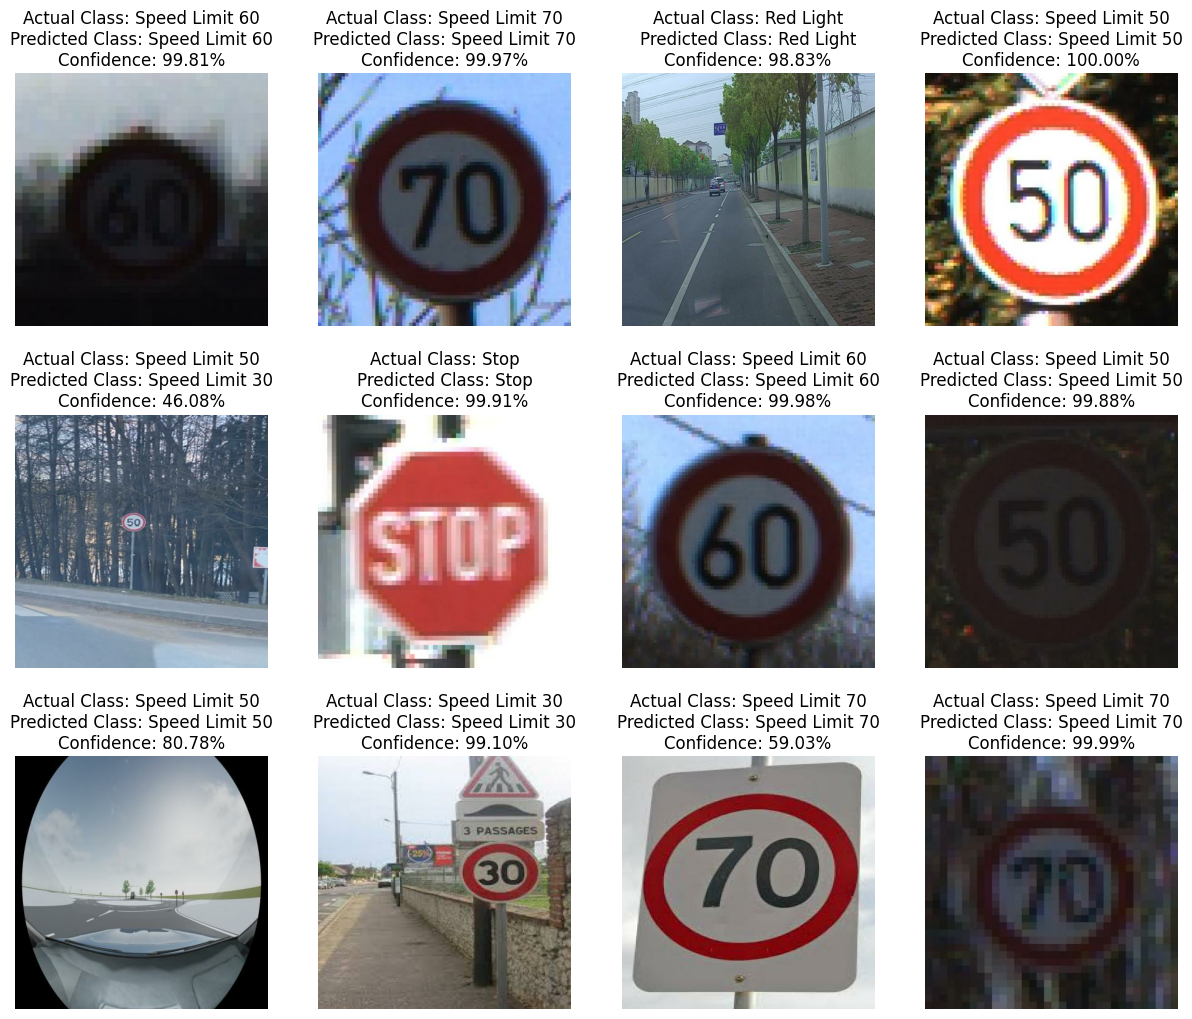

In [26]:
run_predict(model, test_data)

In [29]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def confusion_m(model):
    class_names = test_data.class_names
    
    true_labels = []
    predicted_labels = []
    for images, labels in test_data:
        true_labels.extend(labels.numpy())
        predictions = model.predict(images)
        predicted_labels.extend(np.argmax(predictions, axis=1))

    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)

    cm = confusion_matrix(true_labels, predicted_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5

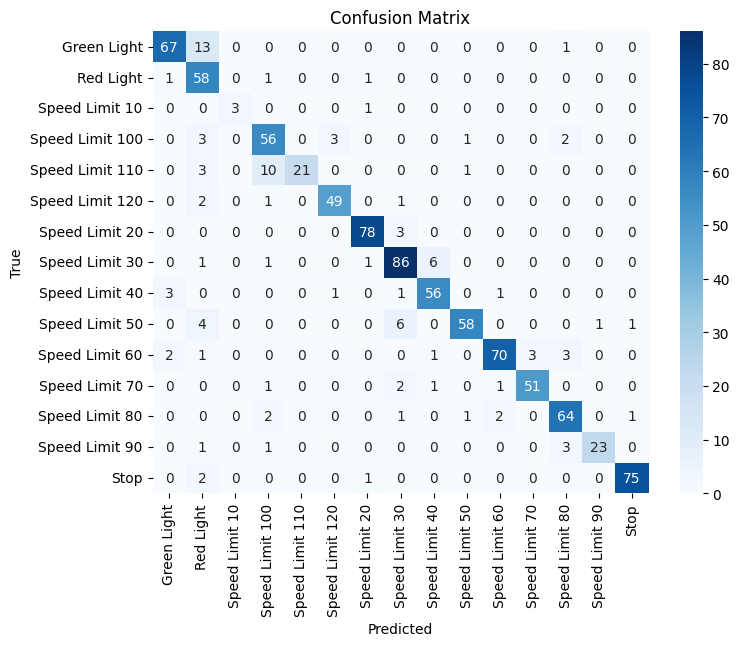

In [31]:
confusion_m(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

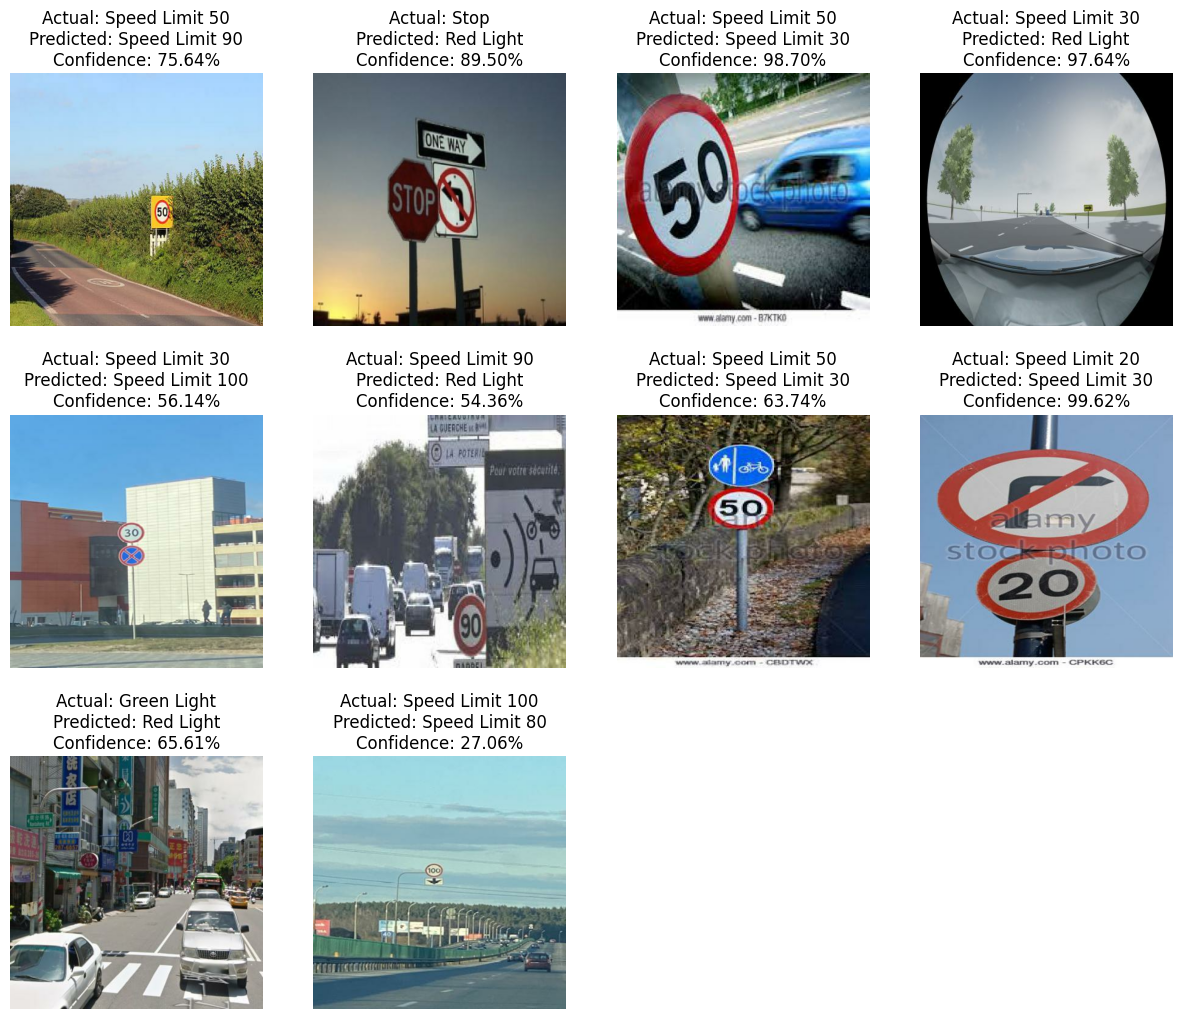

In [27]:
def visualize_misclassified_images(model, test_data):
    """
    Visualize up to 16 misclassified images.
    
    Args:
    - model: Trained TensorFlow/Keras model
    - test_data: TensorFlow test dataset
    """
    plt.figure(figsize=(15, 17))
    misclassified_count = 0  # Counter for misclassified images
    
    for batch_images, batch_labels in test_data:
        for i in range(len(batch_images)):
            predicted_class, confidence = predict(model, batch_images[i])
            actual_class = class_names[batch_labels[i]]
            
            if predicted_class != actual_class:
                misclassified_count += 1
                plt.subplot(4, 4, misclassified_count)
                
                plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
                plt.imshow(batch_images[i].numpy().astype('uint8'))
                plt.axis('off')
                
                # Stop if 16 misclassified images have been plotted
                if misclassified_count == 16:
                    break
        
        if misclassified_count == 16:
            break
    
    if misclassified_count == 0:
        print("No misclassified images found.")
    plt.show()

# Example usage:
# Assuming you have already defined:
# - model
# - class_names
# - IMAGE_SIZE
# - output_test_directory
# - test_data

# Optional: Visualize misclassified images
visualize_misclassified_images(model, test_data)


In [29]:
def count_misclassified_images(model, data):
    misclassified_count = 0
    total_images = 0

    for images, labels in data:
        for i in range(len(images)):
            predicted_class = class_names[np.argmax(model.predict(images[i:i+1]))]
            actual_class = class_names[labels[i]]

            total_images += 1
            if predicted_class != actual_class:
                misclassified_count += 1

    print(f"Total images: {total_images}")
    print(f"Misclassified images: {misclassified_count}")
    return misclassified_count

count_misclassified_images(model, test_data)